# Bipartite graphs / affiliation networks

In [36]:
import networkx as nx
from networkx.algorithms import bipartite

def check_bipartite_and_return(G):
  try:
    left, right = bipartite.sets(G)
    print("Left nodes\n", left, "\nRight nodes\n", right)
    left, right
  except nx.NetworkXError as e: print(e)

G = nx.karate_club_graph()
check_bipartite_and_return(G) # Graph is not bipartite

# You can turn karate club into a bipartite graph as follows
B = nx.Graph()
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])
print(check_bipartite_and_return(B))

print(bipartite.is_bipartite(G), bipartite.is_bipartite(B))

Graph is not bipartite.
Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33} 
Right nodes
 {(13, 33), (1, 21), (1, 3), (30, 32), (25, 31), (5, 6), (2, 8), (0, 2), (15, 32), (1, 17), (0, 7), (14, 33), (23, 32), (0, 10), (3, 7), (22, 33), (0, 3), (19, 33), (31, 32), (24, 31), (32, 33), (1, 2), (30, 33), (27, 33), (0, 21), (9, 33), (2, 9), (24, 27), (26, 29), (8, 32), (0, 17), (2, 13), (0, 11), (0, 4), (2, 27), (23, 25), (4, 10), (28, 31), (6, 16), (26, 33), (3, 13), (8, 33), (1, 13), (23, 29), (20, 32), (0, 12), (2, 32), (29, 33), (1, 19), (2, 3), (0, 5), (8, 30), (0, 8), (23, 33), (0, 1), (2, 7), (18, 32), (3, 12), (2, 28), (5, 16), (5, 10), (4, 6), (0, 19), (20, 33), (0, 13), (29, 32), (15, 33), (24, 25), (0, 6), (28, 33), (14, 32), (0, 31), (1, 7), (23, 27), (1, 30), (22, 32), (18, 33), (31, 33)}
None
False True


In [37]:
## Pollinator network

Pollinators:  ['H92', 'D35', 'Mordella\nbipunctata', 'H94', 'C4', 'Anthidium\nsticticum', 'Camponotus\naetiops', 'D30', 'D22', 'Hylaeus', 'Oedemera\nflavipes', 'Myrabilis\nquadripunctata', 'Bombus\nterrestris', 'Hylaeus\nvariegatus', 'Sphecodes', 'Oedemera\nlurida', 'H93', 'Psilothrix', 'Oxythyrea\nfunesta', 'H83', 'Callophrys\nrubi', 'D26', 'Megachile', 'D21', 'Vanesa\natlantica', 'D28', 'H27', 'Plagiolepsis\npigmaea', 'D33', 'Megaquile', 'D32', 'Colletes', 'C59', 'C56', 'Criptocephalus', 'Helorus\ncoruscus', 'Sphaerophoeria', 'Amegilla\nfemorata?', 'C7', 'D25', 'Andrena', 'Halyctus', 'D24', 'Pieris\nrapae', 'H81', 'Eucera', 'L2', 'Halictus', 'Oedemera\nbarbara', 'Polistes\ngallicum', 'Lasioglossum', 'Cerceris', 'H91', 'Halictus\npyrenaicus', 'H82', 'Conophorus\nvirescens', 'Anthidium', 'Xylocopa', 'C58', 'Mordellistena\npumila', 'Apis\nmelifera', 'D29', 'Oedemera\nnobilis', 'Pyronia\ntithonus', 'Trichodes\napiarius', 'Lassiopogon', 'Halictus\ngemmeus', 'Scolia', 'Nomada', 'C57', 'Pap

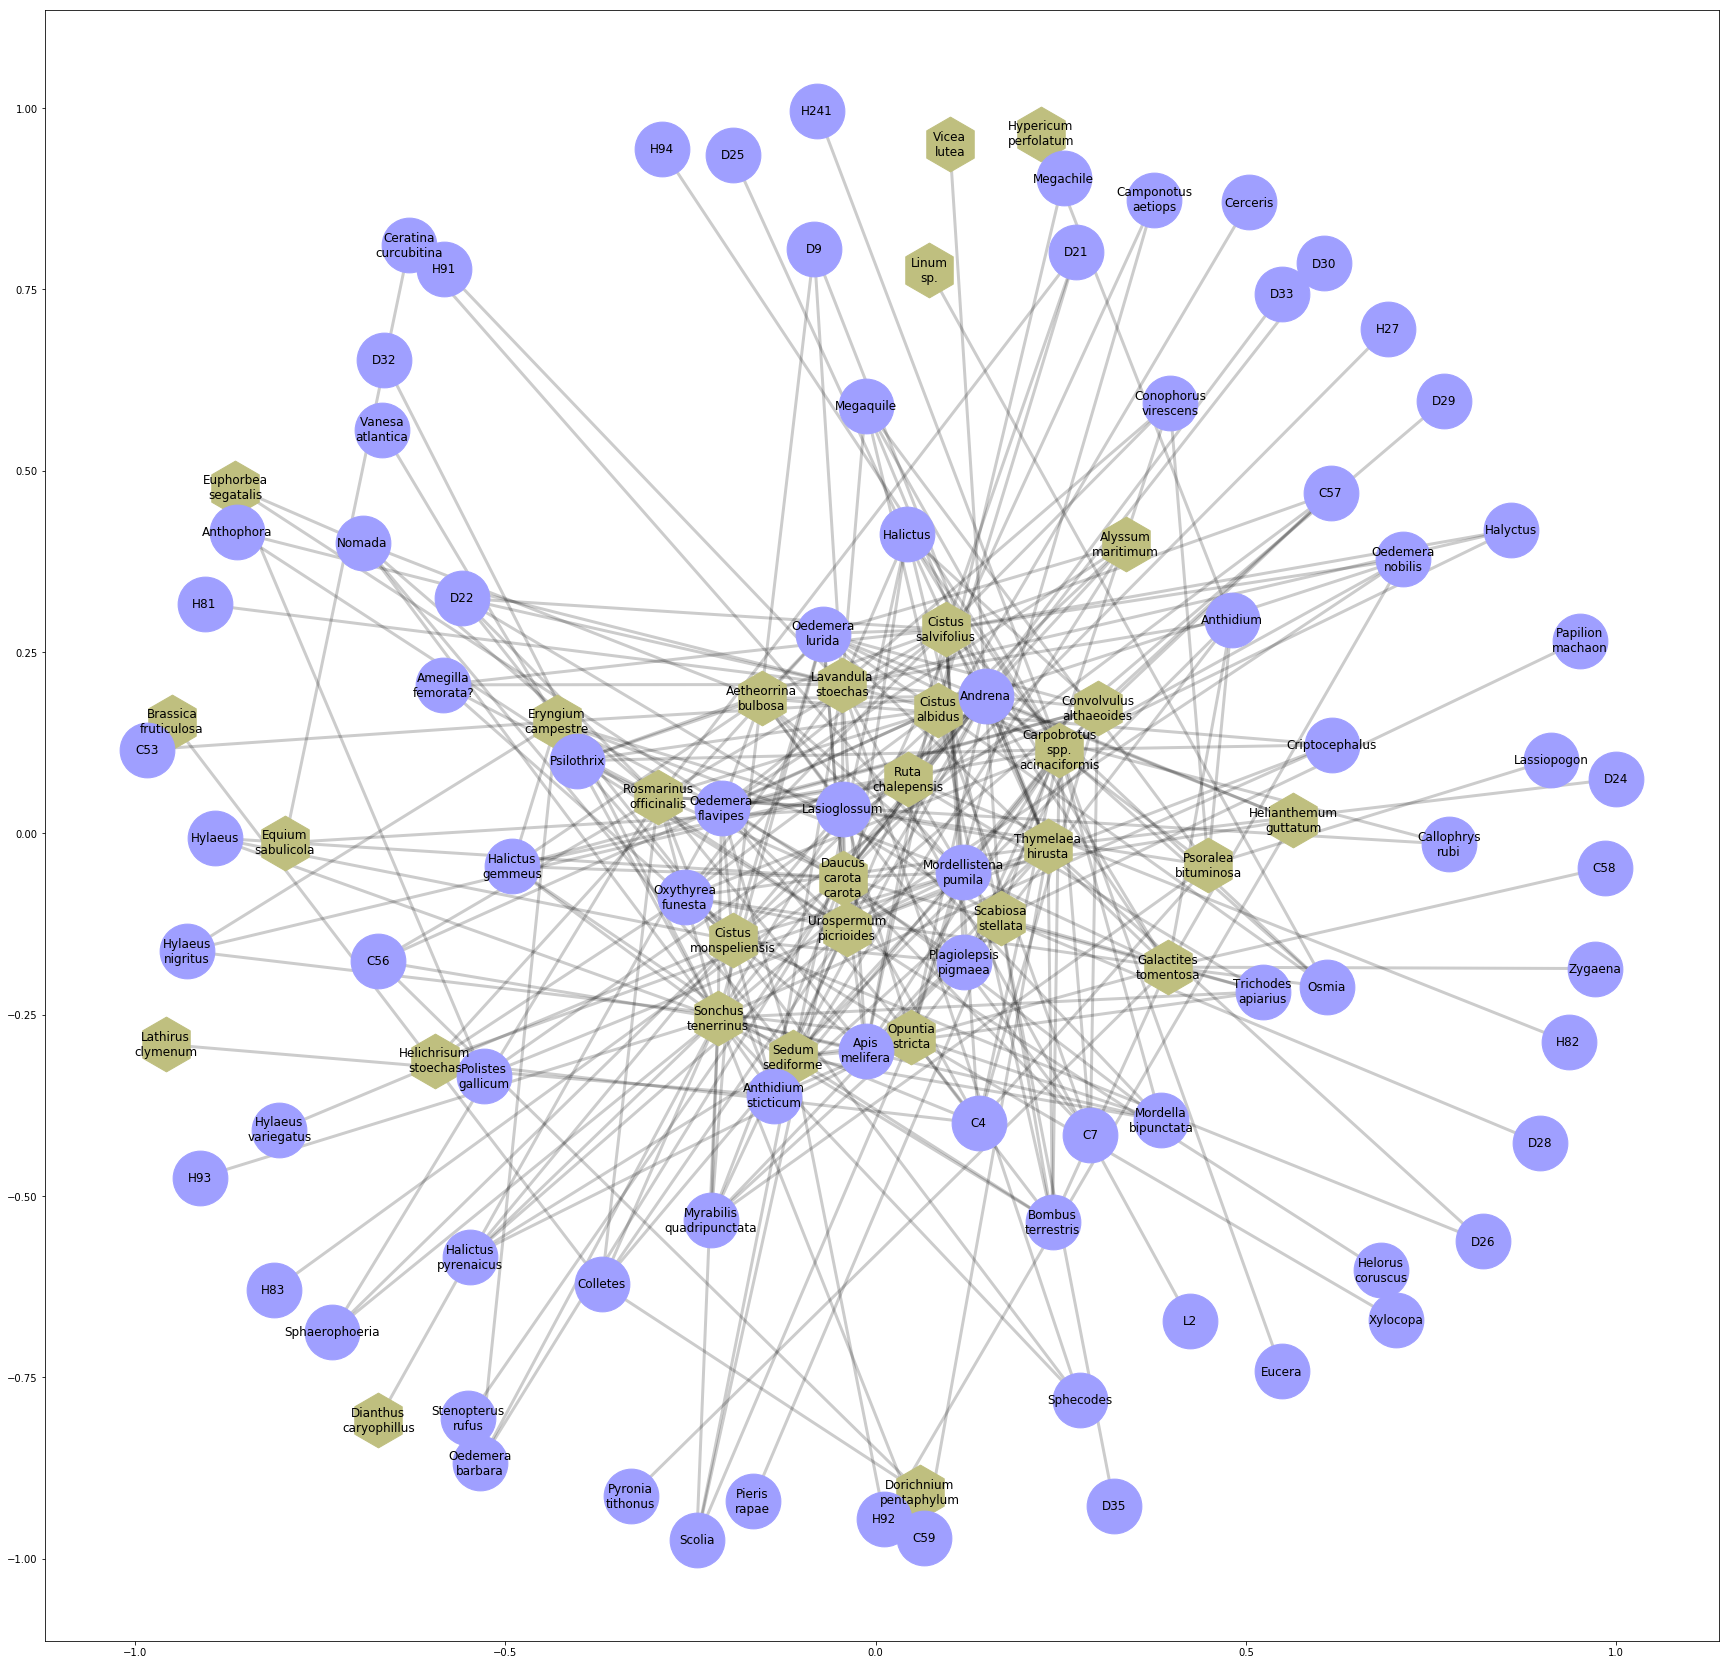

In [38]:
import matplotlib.pyplot as plt

from pathlib import Path
data_dir = Path('.') / 'data'

B = nx.Graph()

with open(str(data_dir / 'bartomeus_ntw_nceas_pollinator_net.txt')) as f:
  next(f) # Skip header row
  for row in f:
    cells = row.strip().split('\t') # Break row into cells (file is TSV)
    plant = cells[4].replace('_', '\n')
    pollinator = cells[8].replace('_', '\n')
    B.add_edge(pollinator, plant)
    # Set node types through attribute "bipartite"
    B.nodes[pollinator]["bipartite"] = 0
    B.nodes[plant]["bipartite"] = 1

B = B.subgraph(list(nx.connected_components(B))[0])

pollinators = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
plants = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

print("Pollinators: ", pollinators, "\nPlants: ", plants)

plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(B, k=0.9)
# Draw using different shapes and colors for plant/pollinators
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#bfbf7f",
node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#9f9fff",
node_size=3000)
nx.draw_networkx_labels(B, pos)
plt.show()

#### Projection: co-affiliation network

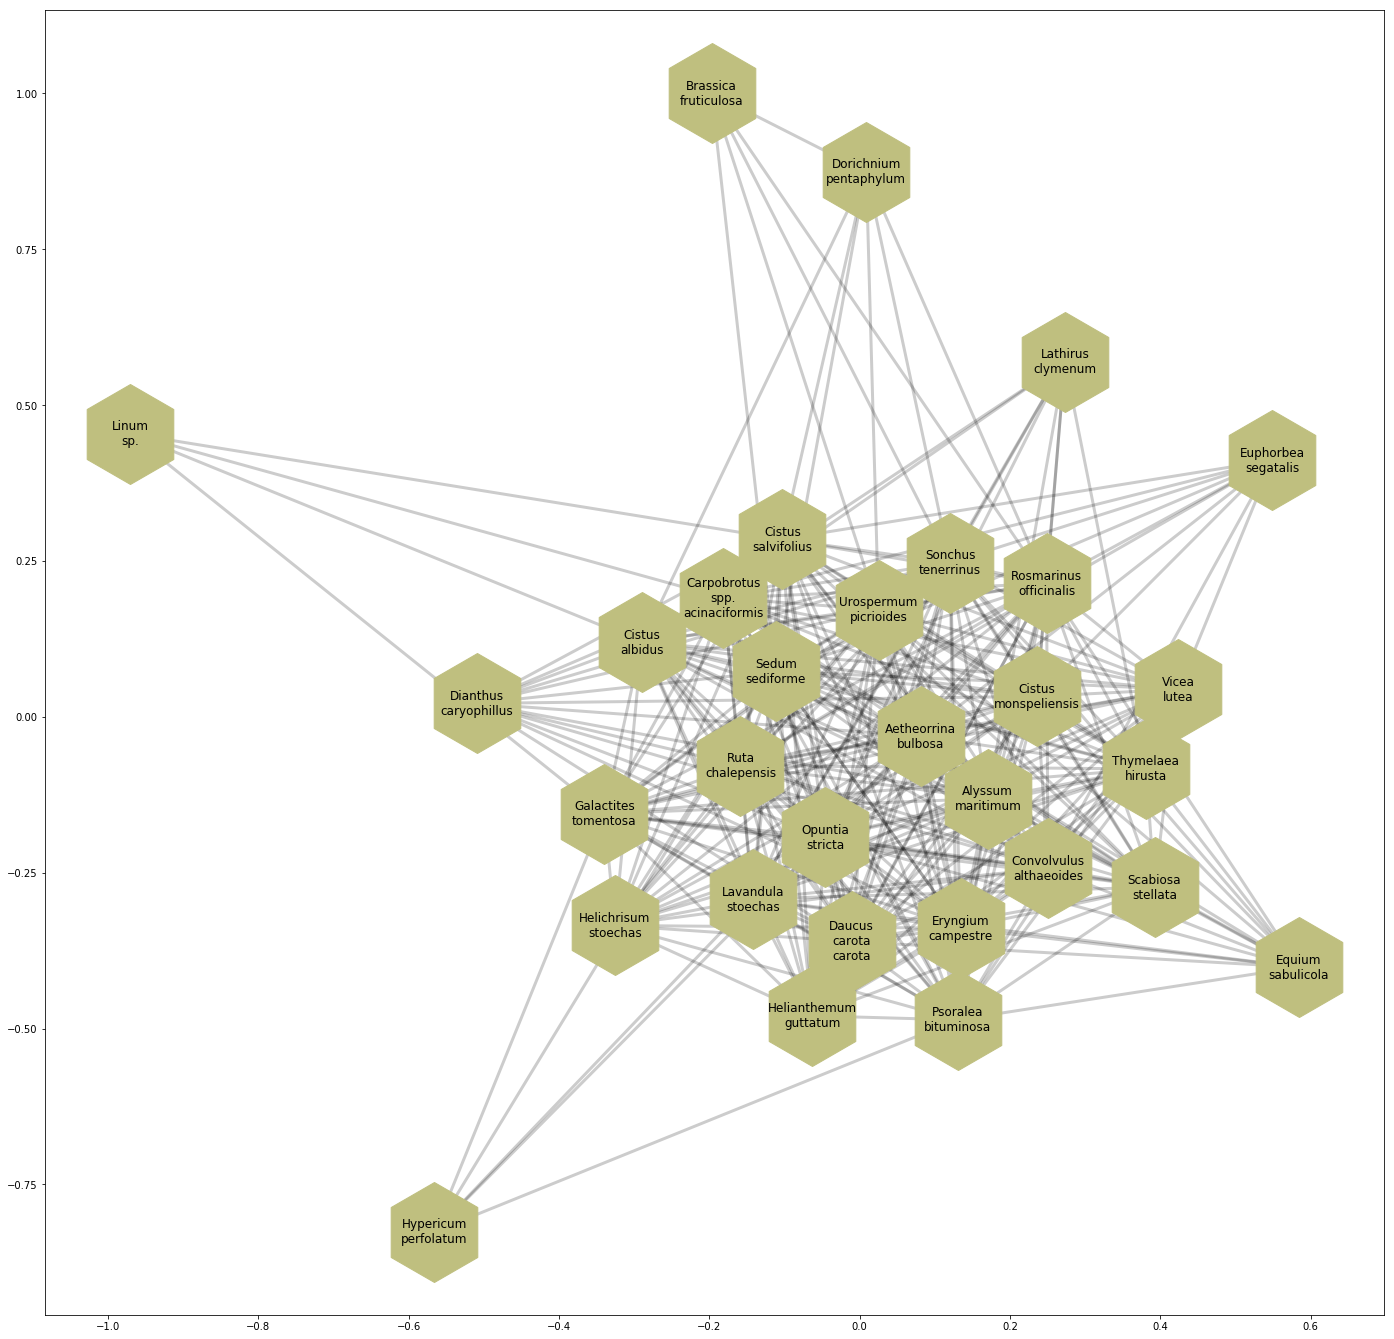

('Urospermum\npicrioides', 'Lavandula\nstoechas', {'weight': 5})
[0.22727272727272727, 0.4444444444444444, 0.375, 0.2, 0.18181818181818182, 0.14285714285714285, 0.26666666666666666, 0.2, 0.25, 0.2, 0.15384615384615385, 0.14285714285714285, 0.16666666666666666, 0.125, 0.2, 0.2, 0.2, 0.2, 0.25, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.25, 0.1111111111111111, 0.3333333333333333, 0.2, 0.1875, 0.09090909090909091, 0.2, 0.3, 0.1111111111111111, 0.25, 0.125, 0.2, 0.13333333333333333, 0.2857142857142857, 0.2, 0.3333333333333333, 0.38461538461538464, 0.16666666666666666, 0.07142857142857142, 0.14285714285714285, 0.0625, 0.09090909090909091, 0.14285714285714285, 0.14285714285714285, 0.1111111111111111, 0.16666666666666666, 0.125, 0.14285714285714285, 0.2, 0.125, 0.16666666666666666, 0.07142857142857142, 0.14285714285714285, 0.2, 0.07692307692307693, 0.2, 0.045454545454545456, 0.14285714285714285, 0.125, 0.25, 1.0, 0.5, 1.0, 1.0, 0.16666666666666666, 0.4, 0.125, 0.230769230

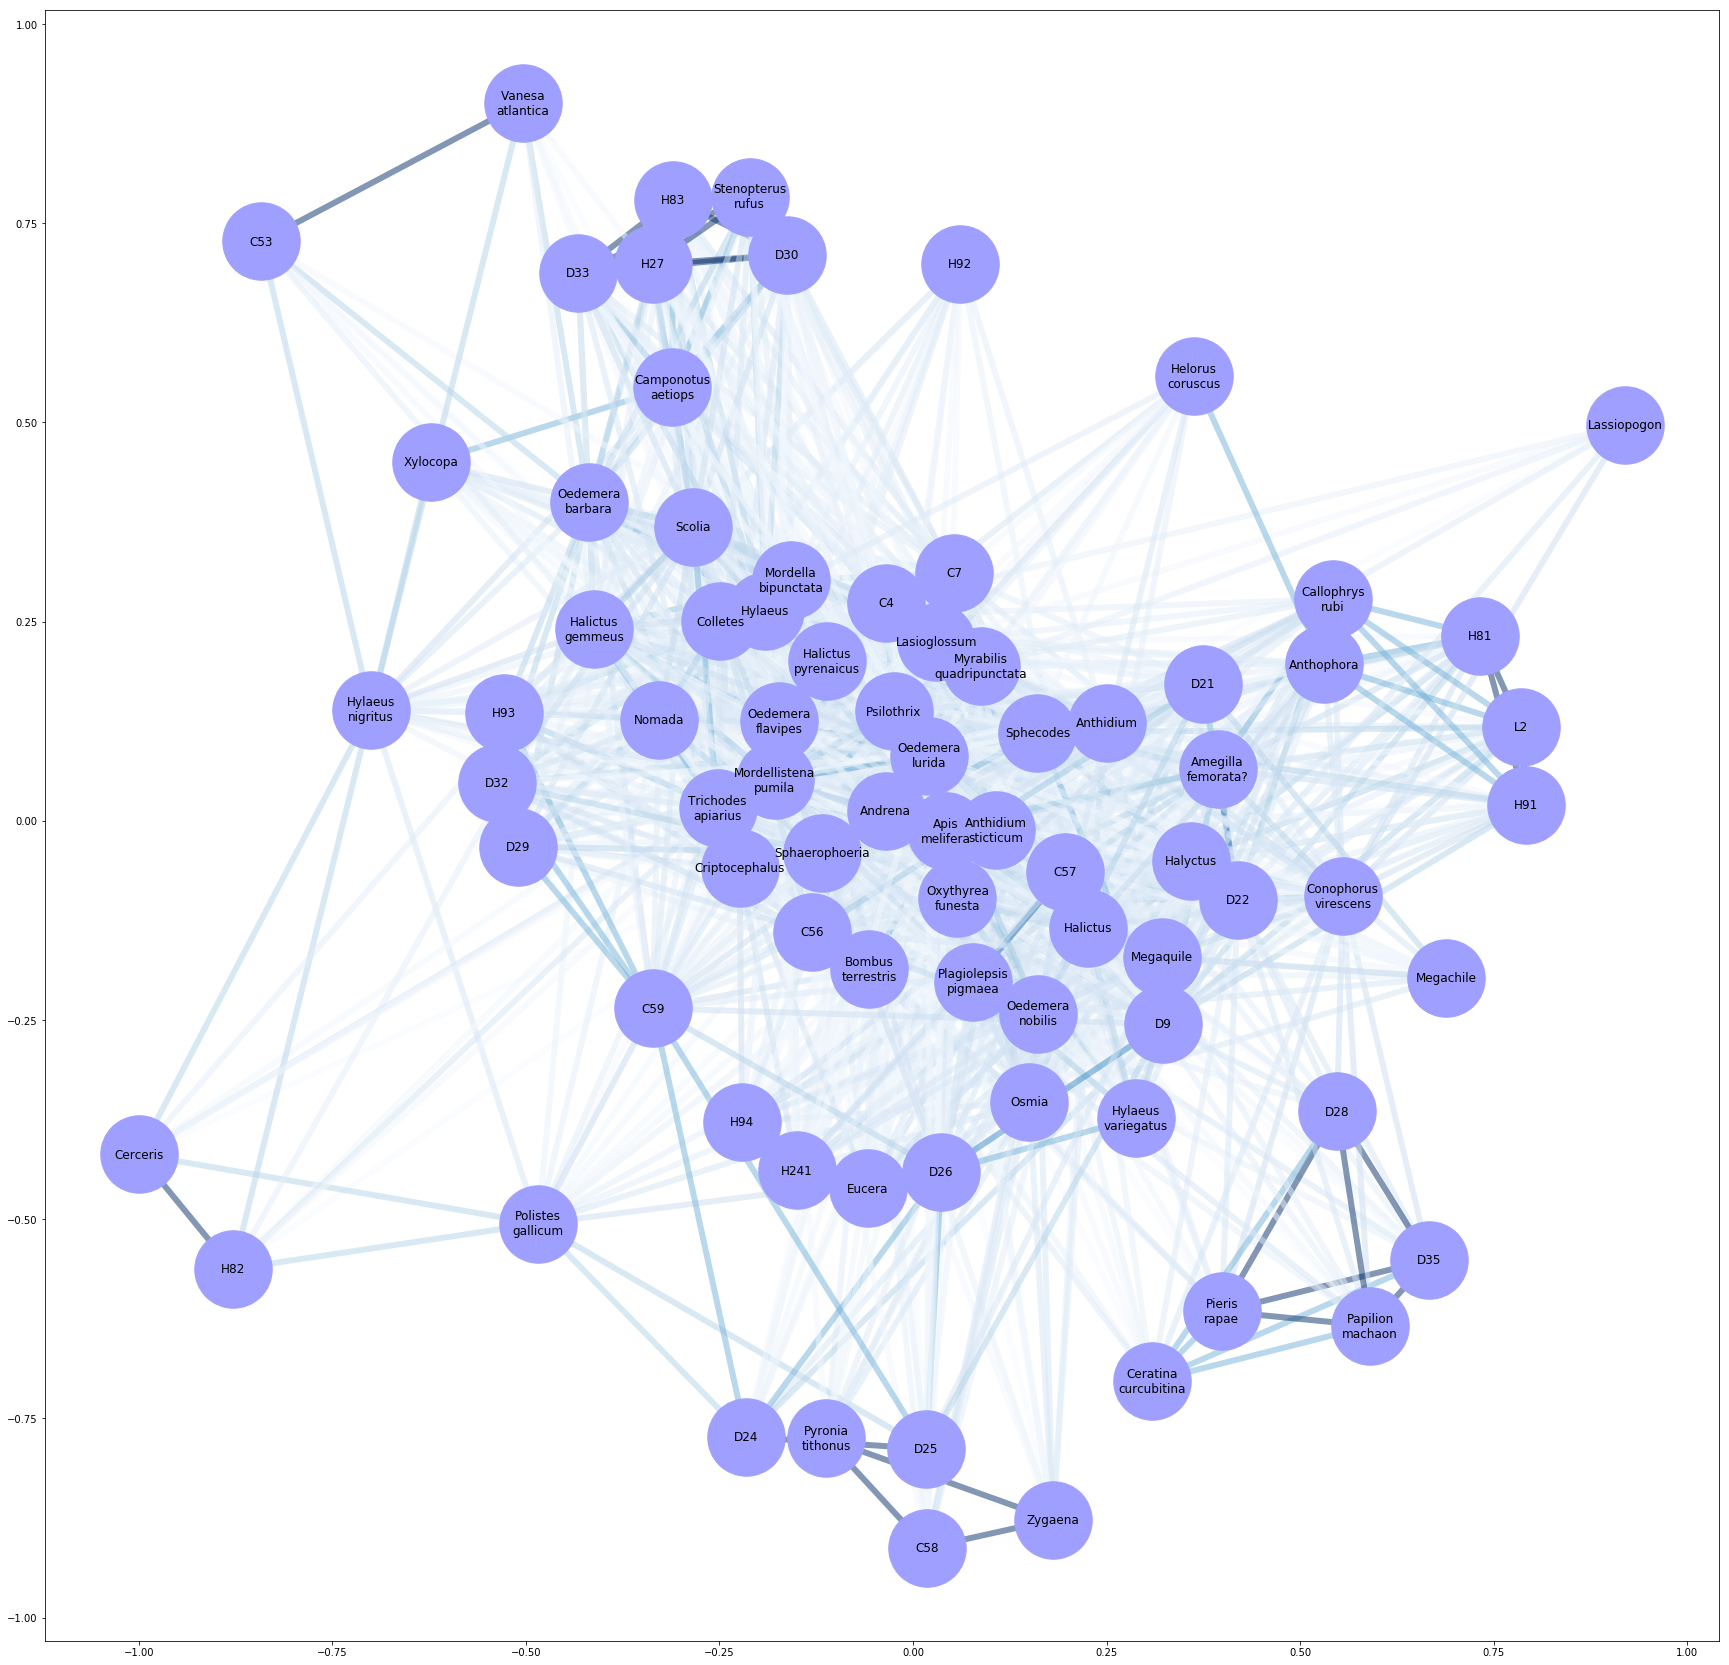

In [39]:
# Create co-affiliation network
G = bipartite.projected_graph(B, plants)
plt.figure(figsize=(24,24))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#bfbf7f", node_shape="h",
node_size=10000)
nx.draw_networkx_labels(G, pos)
plt.show()

# Weighted projection
G = bipartite.weighted_projected_graph(B, plants)
print('Example weight based on count: ', list(G.edges(data=True))[0])

# Weighted projection based on Jaccard index
# We show stronger links among pollinators which share more plants in common
G = bipartite.overlap_weighted_projected_graph(B, pollinators)
weight = [G.edges[e]['weight'] for e in G.edges]
print('Jaccard weights: ', weight)
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G, weight='weight', k=0.5)
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues,
width=6, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)
plt.show()
